# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

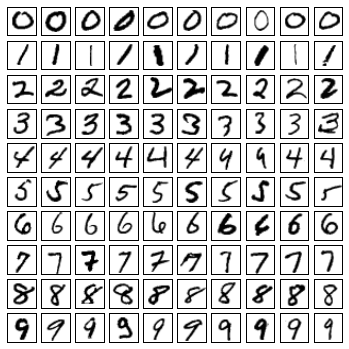

In [72]:
#def P1(num_examples=10):

### STUDENT START ###
num_examples=10

# images are 28x28 per http://yann.lecun.com/exdb/mnist/
image_size = (28,28)

# Set colormap to reverse grayscale
plt.rc('image', cmap='gray_r')

#plt.figure(figsize=(20,20))

# Create a 10x10 grid to visualize 10 examples of each digit.
# f = Figure object, ax = array of axis objects
f, ax = plt.subplots(10, num_examples, figsize=(6,6))

# remove axis ticks
plt.setp(ax, xticks=(), yticks=())

for digit in range (10):
    column = 0
    i = 0
    while column < num_examples:
        # find examples of this digit in the training data
        if train_labels[i] == digit:
            ax[digit,column].imshow(train_data[i].reshape(image_size))
            column += 1
        i += 1
    
### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [73]:
#def P2(k_values):

### STUDENT START ###
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(k)
    
    # train our model with our training data
    knn.fit(train_data, train_labels)
    
    # measure the accuracy of our model with development data
    accuracy = knn.score(dev_data, dev_labels)
    print("k={0}: accuracy={1:.4f}".format(k, accuracy))

    # generate a classification report for k=1
    if k==1:
        targets = ["Digit " + str(a) for a in range(10)]
        report = classification_report(dev_labels, knn.predict(dev_data), target_names=targets, digits=4)
        
print "\nClassification report for k=1\n"
print report
    
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

k=1: accuracy=0.9770
k=3: accuracy=0.9740
k=5: accuracy=0.9730
k=7: accuracy=0.9720
k=9: accuracy=0.9730

Classification report for k=1

             precision    recall  f1-score   support

    Digit 0     0.9612    1.0000    0.9802        99
    Digit 1     1.0000    1.0000    1.0000       105
    Digit 2     0.9800    0.9608    0.9703       102
    Digit 3     0.9540    0.9651    0.9595        86
    Digit 4     0.9903    0.9808    0.9855       104
    Digit 5     0.9670    0.9670    0.9670        91
    Digit 6     0.9897    0.9796    0.9846        98
    Digit 7     0.9911    0.9823    0.9867       113
    Digit 8     0.9780    0.9271    0.9519        96
    Digit 9     0.9550    1.0000    0.9770       106

avg / total     0.9772    0.9770    0.9769      1000



ANSWER: the digit 3 is the most difficult

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [102]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
k = 1
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
#train_sizes = [100]

for train_size in train_sizes:
    knn = KNeighborsClassifier(k)
    
    # train Knn model with a subset of our training data
    knn.fit(train_data[0:train_size], train_labels[0:train_size])

    # measure the model's accuracy and time needed for prediction
    start_time = time.time()
    accuracy = knn.score(dev_data, dev_labels)
    stop_time = time.time()

    # calculate time taken
    xtime = stop_time - start_time

    accuracies.append(accuracy)
    print("train_size={0:5d}, accuracy={1:.4f}, time={2:.4f}".format(train_size, accuracy, xtime))

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

train_size=  100, accuracy=0.7200, time=0.0715
train_size=  200, accuracy=0.7860, time=0.1427
train_size=  400, accuracy=0.8410, time=0.2885
train_size=  800, accuracy=0.8840, time=0.5800
train_size= 1600, accuracy=0.9020, time=1.2843
train_size= 3200, accuracy=0.9260, time=2.5914
train_size= 6400, accuracy=0.9370, time=5.2179
train_size=12800, accuracy=0.9590, time=10.4950
train_size=25000, accuracy=0.9700, time=20.9243


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

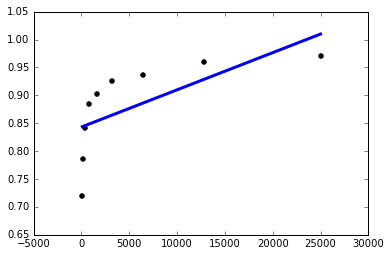

Accuracy prediction for n=60000: 124.31%

With logit transform:
Accuracy prediction for n=100: 85.40%
Accuracy prediction for n=200: 85.51%
Accuracy prediction for n=400: 85.71%
Accuracy prediction for n=800: 86.11%
Accuracy prediction for n=1600: 86.89%
Accuracy prediction for n=3200: 88.33%
Accuracy prediction for n=6400: 90.80%
Accuracy prediction for n=12800: 94.38%
Accuracy prediction for n=25000: 97.88%
Accuracy prediction for n=60000: 99.88%


In [163]:
#def P4():

### STUDENT START ###
train_sizes = np.array(train_sizes).reshape(-1,1)
accuracies = np.array(accuracies).reshape(-1,1)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(train_sizes, accuracies)

# Plot outputs
plt.scatter(train_sizes, accuracies,  color='black')
plt.plot(train_sizes, regr.predict(train_sizes), color='blue', linewidth=3)
plt.show()

n = 60000
pre = regr.predict(n)[0][0]
print("Accuracy prediction for n={0}: {1:0.2f}%".format(n, pre * 100))

# define logit transformation functions
def logit(p):
    return np.log(p / (1. - p))
    
def inv_logit(p):
    return 1. / (1. + np.exp(-p))

# tranform the accuracies
accuracies_transform = logit(accuracies)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(train_sizes, accuracies_transform)

# Print prediction using transformed model
print("\nWith logit transform:")
for n in [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000, 60000]:
    pre_transform = regr.predict(n)[0][0]
    pre = inv_logit(pre_transform)
    print("Accuracy prediction for n={0}: {1:0.2f}%".format(n, pre * 100))

### STUDENT END ###

#P4()

ANSWER: The problem is that accuracies are bounded between [0,1] but the linear regression model does not know that.  We can transform the data using a logit transform to produce values between [-Inf, Inf], run the model, and perform the inverse transform on the results.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]

Some example classification mistakes, with predicted value above
and labeled value below:


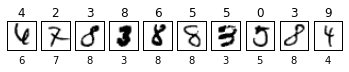

In [75]:
#def P5():

### STUDENT START ###
k=1
knn = KNeighborsClassifier(k)

# train our model with our training data
knn.fit(train_data, train_labels)

# generate predictions from development data
predictions = knn.predict(dev_data)

# generate a confusion matrix
c = confusion_matrix(dev_labels, predictions)
print c

# display a few example classification mistakes
num_mistakes = 10
f, ax = plt.subplots(1, num_mistakes)

# remove axis ticks
plt.setp(ax, xticks=(), yticks=())

print("\nSome example classification mistakes, with predicted value above")
print("and labeled value below:")

mistakes = 0
for i in xrange (len(dev_data)):
    if (predictions[i] != dev_labels[i]):
        # this is a mistake
        
        ax[mistakes].imshow(dev_data[i].reshape(image_size))
        ax[mistakes].set_title(int(predictions[i]))
        ax[mistakes].set_xlabel(int(dev_labels[i]))

        mistakes += 1
        if (mistakes >= num_mistakes):
            break
    
### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [5]:
#def P6():
    
### STUDENT START ###
def simple_blur(X_all):
    Y_all = []
    for X in X_all:
        X = X.reshape(28,28)
        (x_len, y_len) = X.shape
        Y = np.zeros([x_len, y_len])

        for i in range (x_len):
            for j in range (y_len):
                # For simplicity, ignore the edges of the image
                if (i == 0) or (j == 0) or (i == x_len-1) or (j == y_len-1):
                    Y[i,j] = X[i,j]
                    continue
                # else, calculate smoothed value for Y from 8 neighbors
                # see http://www.pixelstech.net/article/1353768112-Gaussian-Blur-Algorithm
                Y[i,j] = ( 0.147761 * X[i,j] +
                    0.118318 * (X[i-1,j] + X[i, j-1] + X[i+1,j] + X[i,j+1]) +
                    0.0947416 * (X[i-1,j-1] + X[i+1, j-1] + X[i+1,j+1] + X[i-1,j+1]) )

        Y = Y.reshape(-1)
        Y_all.append(Y)
    return (Y_all)

# smooth training and development data
train_data_smooth = simple_blur(train_data)
dev_data_smooth = simple_blur(dev_data)

# preprocess the training data but not the dev data
knn = KNeighborsClassifier(1)
knn.fit(train_data_smooth, train_labels)
accuracy = knn.score(dev_data, dev_labels)
print("Smoothing train_data : accuracy={0:.4f}".format(accuracy))

# preprocess the dev data but not the training data
knn = KNeighborsClassifier(1)
knn.fit(train_data, train_labels)
accuracy = knn.score(dev_data_smooth, dev_labels)
print("Smoothing dev_data   : accuracy={0:.4f}".format(accuracy))

# preprocess both training and dev data
knn = KNeighborsClassifier(1)
knn.fit(train_data_smooth, train_labels)
accuracy = knn.score(dev_data_smooth, dev_labels)
print("Smoothing train_data + dev_data : accuracy={0:.4f}".format(accuracy))


### STUDENT END ###

#P6()

Smoothing train_data : accuracy=0.9810
Smoothing dev_data   : accuracy=0.9630
Smoothing train_data + dev_data : accuracy=0.9780


ANSWER: Smoothing the training data improves accuracy, but smoothing the development data lowers accuracy.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [8]:
#def P7():

### STUDENT START ###
# create a Naive Bayes classifier with a binarization threshold of 0.5
bnb = BernoulliNB(binarize=0.5)

# train model with training data
bnb.fit(train_data, train_labels)

# measure the accuracy of the model with development data
accuracy = bnb.score(dev_data, dev_labels)
print("BernoulliNB  accuracy={0:.4f}".format(accuracy))

# classify pixels into either white, grey, or black based on thresholds of 0.3 and 0.7
def grayify_pixel(x):
    if   (x < .3): return 0
    elif (x < .7): return 1
    else:          return 2

def grayify_image(X):
    # convert each pixel to 3-level grayscale
    return map(grayify_pixel, X)

# convert each image to 3-level grayscale
train_data_trinary = map(grayify_image, train_data)

# create a Naive Bayes classifier for multinomial models
mnb = MultinomialNB()

# train model with training data
mnb.fit(train_data_trinary, train_labels)

# measure the accuracy of the model with development data
accuracy = mnb.score(dev_data, dev_labels)
print("MultinomialNB accuracy={0:.4f}".format(accuracy))
    
### STUDENT END ###

#P7()

BernoulliNB accuracy=0.8450
MultinomialNB accuracy=0.8280


ANSWER: No, the binary model is actually better.  This is likely because with the grayscale model the classifier has to distinguish between different colors of ink, when in reality we only care about ink or no ink.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [47]:
#def P8(alphas):

### STUDENT START ###
# good info: http://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

# create a Naive Bayes classifier with a binarization threshold of 0.5
bnb = BernoulliNB(binarize=0.5)

# alpha values to test
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

# perform a grid search on training data
gs = GridSearchCV(estimator=bnb, param_grid=alphas)
gs.fit(train_data, train_labels)

# print best results
print("Best alpha = {0}, accuracy={1:.4f}\n".format(gs.best_estimator_.alpha, gs.best_score_))

# print out the results for each alpha value
for s in gs.grid_scores_:
    alpha = s.parameters['alpha']
    print("alpha={0:3.4f}, accuracy={1:.4f}".format(alpha, s.mean_validation_score))

### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

Best alpha = 0.0001, accuracy=0.8369

alpha=0.0000, accuracy=0.0989
alpha=0.0001, accuracy=0.8369
alpha=0.0010, accuracy=0.8367
alpha=0.0100, accuracy=0.8365
alpha=0.1000, accuracy=0.8361
alpha=0.5000, accuracy=0.8354
alpha=1.0000, accuracy=0.8350
alpha=2.0000, accuracy=0.8345
alpha=10.0000, accuracy=0.8325


In [45]:
#print nb.best_params_

ANSWER: The accuracy for alpha=0 is very low (0.0989). This is to be expected, as alpha=0 corresponds to no smoothing, which can be harsh in the naive Bayes model. If a certain value is not observed in training data then it can dramatically throw off the accuracy.

(9) Try training a model using GaussianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [68]:
#def P9():

### STUDENT END ###

# create a Naive Bayes classifier with a binarization threshold of 0.5
gnb = GaussianNB()

# train model with training data
gnb.fit(train_data, train_labels)

# measure the accuracy of the model with development data
accuracy = gnb.score(dev_data, dev_labels)
print("GaussianNB accuracy={0:.4f}, theta~{1:.4f}, sigma~{2:.4f}"
      .format(accuracy, np.mean(gnb.theta_), np.mean(gnb.sigma_)))

# set the sigma value for each of the features to 1
num_features = len(train_data[0])
gnb.sigma_ = np.tile(1, (10, num_features))

# measure the accuracy of the model with development data
accuracy = gnb.score(dev_data, dev_labels)
print("GaussianNB accuracy={0:.4f}, theta~{1:.4f}, sigma~{2:.4f}"
      .format(accuracy, np.mean(gnb.theta_), np.mean(gnb.sigma_)))

### STUDENT END ###

#gnb = P9()

GaussianNB accuracy=0.5710, theta~0.1317, sigma~0.0537
GaussianNB accuracy=0.8060, theta~0.1317, sigma~3.0000


ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

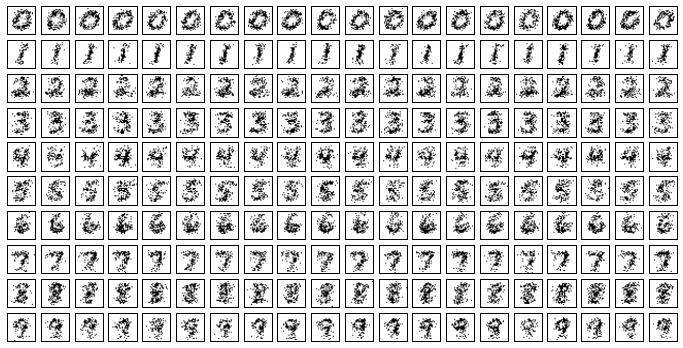

In [100]:
#def P10(num_examples):

### STUDENT START ###
# create a Naive Bayes classifier with a binarization threshold of 0.5
bnb = BernoulliNB(binarize=0.5)

# train model with training data
bnb.fit(train_data, train_labels)

feature_prob = np.exp(bnb.feature_log_prob_)
#print feature_prob.size
#print feature_prob

# Create a 10x20 grid to visualize 20 examples of each digit.
num_examples = 20
num_features = len(train_data[0])

# f = Figure object, ax = array of axis objects
f, ax = plt.subplots(10, num_examples, figsize=(12,6))

# remove axis ticks
plt.setp(ax, xticks=(), yticks=())

for digit in range (10):
    P = feature_prob[digit]
    for column in range (num_examples):
        R = np.random.rand(num_features)
        pixels = []
        for i in range(num_features):
            if R[i] < P[i]:
                R[i] = 1
            else:
                R[i] = 0
        ax[digit,column].imshow(R.reshape(image_size))
            
            
        # RP = R * P[digit].transpose()
        #for pixel in range(num_features):
                
        # r = np.random.rand()
        #r = feature_prob[digit]
        # ax[digit,column].imshow(r.reshape(image_size))
    
### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [215]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

# create a Naive Bayes classifier with a binarization threshold of 0.5
bnb = BernoulliNB(binarize=0.5)

# train model with training data
bnb.fit(train_data, train_labels)

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]

#total = {}
#correct = {}

for bucket in buckets:
    total[bucket] = 0
    correct[bucket] = 0

for (data, label) in zip(dev_data, dev_labels):
    # get the predicted value and probability vector
    pred = bnb.predict(data.reshape(1,-1))
    Prob = bnb.predict_proba(data.reshape(1,-1))
    
    # find the bucket the posterior fits in
    for bucket in buckets:
        if Prob[0, int(pred)] <= bucket:
            
            # increment the counter (set to 0 first if it does not exist)
            total[bucket] = total.get(bucket, 0) + 1
            
            # if the prediction was correct, then increment the counter
            if (pred == label):
                correct[bucket] = correct.get(bucket, 0) + 1
            
            # we found the bucket so move on
            break

for bucket in buckets:
    print ("Bucket {0:.13f}: {1:3d} / {2:3d} correct ({3:.4f}%)".format(
        bucket, correct[bucket], total[bucket], float(correct[bucket]) / total[bucket]))

                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

Bucket 0.5000000000000:   0 /   3 correct (0.0000%)
Bucket 0.9000000000000:  22 /  42 correct (0.5238%)
Bucket 0.9990000000000:  52 / 101 correct (0.5149%)
Bucket 0.9999900000000:  47 /  74 correct (0.6351%)
Bucket 0.9999999000000:  44 /  63 correct (0.6984%)
Bucket 0.9999999990000:  61 /  70 correct (0.8714%)
Bucket 0.9999999999900:  68 /  76 correct (0.8947%)
Bucket 0.9999999999999:  79 /  85 correct (0.9294%)
Bucket 1.0000000000000: 472 / 486 correct (0.9712%)


ANSWER: Naive Bayes is strongly calibrated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()